In [2]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [1]:
df_url ="https://raw.githubusercontent.com/ABCchocolate/NIDS/main/Dos/Total_KSL-KDD.csv"

#파일 불러오기

In [3]:
df = pd.read_csv(df_url)

In [4]:
df

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,148512,0,tcp,smtp,SF,794,333,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,148513,0,tcp,http,SF,317,938,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,148514,0,tcp,http,SF,54540,8314,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,148515,0,udp,domain_u,SF,42,42,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
dfdos = df.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 1)
dfprobe = dfdos.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 2)
dfr2l = dfprobe.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 3)
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 4)
dfnormal = dfu2r.replace(['normal'], 0)
newdf = dfnormal
newdf

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,2,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,148512,0,tcp,smtp,SF,794,333,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
148513,148513,0,tcp,http,SF,317,938,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
148514,148514,0,tcp,http,SF,54540,8314,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
148515,148515,0,udp,domain_u,SF,42,42,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [6]:
newdf.value_counts('label')

label
0    77054
1    53385
2    14077
3     3882
4      119
dtype: int64

In [7]:
condition = (newdf.label == 0) | (newdf.label == 1) 
df_dos = newdf[condition]
df_dos = df_dos.reset_index(drop=True)
df_dos

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,2,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,148511,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
130435,148512,0,tcp,smtp,SF,794,333,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
130436,148513,0,tcp,http,SF,317,938,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
130437,148514,0,tcp,http,SF,54540,8314,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1


In [8]:
df_dos.value_counts('label')

label
0    77054
1    53385
dtype: int64

In [9]:
newdf_dos = df_dos.drop(['protocol_type',
             'urgent',
             'num_failed_logins',
             'logged_in',
             'num_compromised',
             'root_shell',
             'su_attempted',
             'num_root',
             'num_file_creations',
             'num_shells',
             'num_access_files',
             'num_outbound_cmds',
             'is_host_login',
             'is_guest_login',
             'srv_rerror_rate',
             'srv_diff_host_rate',
             'dst_host_srv_count',
             'dst_host_srv_diff_host_rate',
             'dst_host_srv_rerror_rate'], axis=1
             )
newdf_dos

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,label
0,0,0,ftp_data,SF,491,0,0,0,0,2,...,1.00,0.00,150,0.17,0.03,0.17,0.00,0.00,0.05,0
1,1,0,other,SF,146,0,0,0,0,13,...,0.08,0.15,255,0.00,0.60,0.88,0.00,0.00,0.00,0
2,2,0,private,S0,0,0,0,0,0,123,...,0.05,0.07,255,0.10,0.05,0.00,1.00,1.00,0.00,1
3,3,0,http,SF,232,8153,0,0,0,5,...,1.00,0.00,30,1.00,0.00,0.03,0.03,0.01,0.00,0
4,4,0,http,SF,199,420,0,0,0,30,...,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,148511,0,ecr_i,SF,1032,0,0,0,0,53,...,1.00,0.00,255,1.00,0.00,1.00,0.00,0.00,0.00,1
130435,148512,0,smtp,SF,794,333,0,0,0,1,...,1.00,0.00,100,0.72,0.06,0.01,0.01,0.00,0.00,0
130436,148513,0,http,SF,317,938,0,0,0,2,...,1.00,0.00,197,1.00,0.00,0.01,0.01,0.00,0.00,0
130437,148514,0,http,SF,54540,8314,0,0,2,5,...,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.07,1


In [10]:
for columns in newdf_dos.columns:
  if newdf_dos[columns].dtypes == 'object':
    print(columns, '\n종류:', newdf_dos[columns].unique(), '\n개수:', newdf_dos[columns].nunique(), '\n')

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50' 'smtp'
 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp' 'bgp'
 'ldap' 'ecr_i' 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'gopher' 'imap4'
 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'time'
 'sql_net' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier' 'eco_i'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i' 'tftp_u'] 
개수: 65 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTO' 'S1' 'RSTR' 'S3' 'S2' 'OTH' 'SH' 'RSTOS0'] 
개수: 11 



In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(newdf_dos['service'])
service = le.transform(newdf_dos['service'])

le.fit(newdf_dos['flag'])
flag = le.transform(newdf_dos['flag'])

newdf_dos['service'] = service
newdf_dos['flag'] = flag

In [12]:
dos_lo = newdf_dos
dos_lo

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,label
0,0,0,19,9,491,0,0,0,0,2,...,1.00,0.00,150,0.17,0.03,0.17,0.00,0.00,0.05,0
1,1,0,40,9,146,0,0,0,0,13,...,0.08,0.15,255,0.00,0.60,0.88,0.00,0.00,0.00,0
2,2,0,44,5,0,0,0,0,0,123,...,0.05,0.07,255,0.10,0.05,0.00,1.00,1.00,0.00,1
3,3,0,22,9,232,8153,0,0,0,5,...,1.00,0.00,30,1.00,0.00,0.03,0.03,0.01,0.00,0
4,4,0,22,9,199,420,0,0,0,30,...,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,148511,0,14,9,1032,0,0,0,0,53,...,1.00,0.00,255,1.00,0.00,1.00,0.00,0.00,0.00,1
130435,148512,0,49,9,794,333,0,0,0,1,...,1.00,0.00,100,0.72,0.06,0.01,0.01,0.00,0.00,0
130436,148513,0,22,9,317,938,0,0,0,2,...,1.00,0.00,197,1.00,0.00,0.01,0.01,0.00,0.00,0
130437,148514,0,22,9,54540,8314,0,0,2,5,...,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.07,1


In [13]:
for columns in dos_lo.columns:
  if dos_lo[columns].dtypes == 'object':
    print(columns, '\n종류:', dos_lo[columns].unique(), '\n개수:', dos_lo[columns].nunique(), '\n')
  else:
    print('object X')
    break

object X


In [14]:
dos_loX = dos_lo.drop(['label'],axis=1)
dos_loX

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,0,19,9,491,0,0,0,0,2,...,0.0,1.00,0.00,150,0.17,0.03,0.17,0.00,0.00,0.05
1,1,0,40,9,146,0,0,0,0,13,...,0.0,0.08,0.15,255,0.00,0.60,0.88,0.00,0.00,0.00
2,2,0,44,5,0,0,0,0,0,123,...,0.0,0.05,0.07,255,0.10,0.05,0.00,1.00,1.00,0.00
3,3,0,22,9,232,8153,0,0,0,5,...,0.0,1.00,0.00,30,1.00,0.00,0.03,0.03,0.01,0.00
4,4,0,22,9,199,420,0,0,0,30,...,0.0,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,148511,0,14,9,1032,0,0,0,0,53,...,0.0,1.00,0.00,255,1.00,0.00,1.00,0.00,0.00,0.00
130435,148512,0,49,9,794,333,0,0,0,1,...,0.0,1.00,0.00,100,0.72,0.06,0.01,0.01,0.00,0.00
130436,148513,0,22,9,317,938,0,0,0,2,...,0.0,1.00,0.00,197,1.00,0.00,0.01,0.01,0.00,0.00
130437,148514,0,22,9,54540,8314,0,0,2,5,...,0.0,1.00,0.00,255,1.00,0.00,0.00,0.00,0.00,0.07


In [15]:
dosY = dos_lo['label']
dosY= pd.DataFrame(dosY)
dosY

,label
0,0
1,0
2,1
3,0
4,0
...,...
130434,1
130435,0
130436,0
130437,1


In [16]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format
#pd.reset_option('display.float_format')
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dos_loX)

dosX = pd.DataFrame(np_scaled, columns = dos_loX.columns)

dosX

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0.000000000,0.000000000,0.296875000,0.900000000,0.000005481,0.000000000,0.000000000,0.000000000,0.000000000,0.003913894,...,0.000000000,1.000000000,0.000000000,0.588235294,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.050000000
1,0.000006733,0.000000000,0.625000000,0.900000000,0.000001630,0.000000000,0.000000000,0.000000000,0.000000000,0.025440313,...,0.000000000,0.080000000,0.150000000,1.000000000,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000
2,0.000013467,0.000000000,0.687500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.240704501,...,0.000000000,0.050000000,0.070000000,1.000000000,0.100000000,0.050000000,0.000000000,1.000000000,1.000000000,0.000000000
3,0.000020200,0.000000000,0.343750000,0.900000000,0.000002590,0.001159966,0.000000000,0.000000000,0.000000000,0.009784736,...,0.000000000,1.000000000,0.000000000,0.117647059,1.000000000,0.000000000,0.030000000,0.030000000,0.010000000,0.000000000
4,0.000026933,0.000000000,0.343750000,0.900000000,0.000002221,0.000059755,0.000000000,0.000000000,0.000000000,0.058708415,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0.999973067,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.103718200,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000
130435,0.999979800,0.000000000,0.765625000,0.900000000,0.000008863,0.000047378,0.000000000,0.000000000,0.000000000,0.001956947,...,0.000000000,1.000000000,0.000000000,0.392156863,0.720000000,0.060000000,0.010000000,0.010000000,0.000000000,0.000000000
130436,0.999986533,0.000000000,0.343750000,0.900000000,0.000003539,0.000133454,0.000000000,0.000000000,0.000000000,0.003913894,...,0.000000000,1.000000000,0.000000000,0.772549020,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000
130437,0.999993267,0.000000000,0.343750000,0.900000000,0.000608831,0.001182873,0.000000000,0.000000000,0.019801980,0.009784736,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000


In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

In [18]:
dfrus_X, dfrus_Y = rus.fit_resample(dosX, dosY)
dfrus_X = pd.DataFrame(dfrus_X, columns=dosX.columns)

In [19]:
dfrus_X

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0.189758610,0.000000000,0.171875000,0.900000000,0.000000458,0.000018211,0.000000000,0.000000000,0.000000000,0.136986301,...,0.000000000,1.000000000,0.000000000,1.000000000,0.930000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000
1,0.697417769,0.000000000,0.343750000,0.900000000,0.000003159,0.000213839,0.000000000,0.000000000,0.000000000,0.003913894,...,0.000000000,1.000000000,0.000000000,0.345098039,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000
2,0.645806821,0.238379460,0.625000000,0.900000000,0.000001630,0.000014939,0.000000000,0.000000000,0.000000000,0.009784736,...,0.000000000,0.400000000,0.600000000,1.000000000,0.010000000,0.860000000,1.000000000,0.000000000,0.000000000,0.000000000
3,0.451227149,0.000000000,0.343750000,0.900000000,0.000003449,0.000129328,0.000000000,0.000000000,0.000000000,0.017612524,...,0.000000000,1.000000000,0.000000000,0.501960784,1.000000000,0.000000000,0.010000000,0.000000000,0.000000000,0.000000000
4,0.322728344,0.000000000,0.171875000,0.900000000,0.000000502,0.000018496,0.000000000,0.000000000,0.000000000,0.442270059,...,0.000000000,1.000000000,0.000000000,1.000000000,0.990000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106765,0.999946133,0.000000000,0.687500000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.459882583,...,1.000000000,0.040000000,0.060000000,1.000000000,0.040000000,0.070000000,0.000000000,0.000000000,0.000000000,1.000000000
106766,0.999959600,0.000000000,0.390625000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.248532290,...,1.000000000,0.140000000,0.060000000,1.000000000,0.070000000,0.050000000,0.000000000,0.000000000,0.000000000,1.000000000
106767,0.999966333,0.000018365,0.765625000,0.900000000,0.000029013,0.000041687,0.000000000,0.000000000,0.000000000,0.003913894,...,0.000000000,1.000000000,0.000000000,1.000000000,0.730000000,0.130000000,0.000000000,0.000000000,0.000000000,0.260000000
106768,0.999973067,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.103718200,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000


In [20]:
dfrus_Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
106765,1
106766,1
106767,1
106768,1


In [21]:
dfrus_Y.value_counts('label')

label
0    53385
1    53385
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

print(x.shape, y.shape)
print(x_test.shape, y_test.shape)

(85416, 23) (85416, 1)
(21354, 23) (21354, 1)


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(x, y)

ytest_preds = xgb.predict(x_test)

print('Accuracy: %.2f' % accuracy_score(y_test, ytest_preds))

Accuracy: 1.00


In [24]:
y_test.value_counts()

label
1        10762
0        10592
dtype: int64

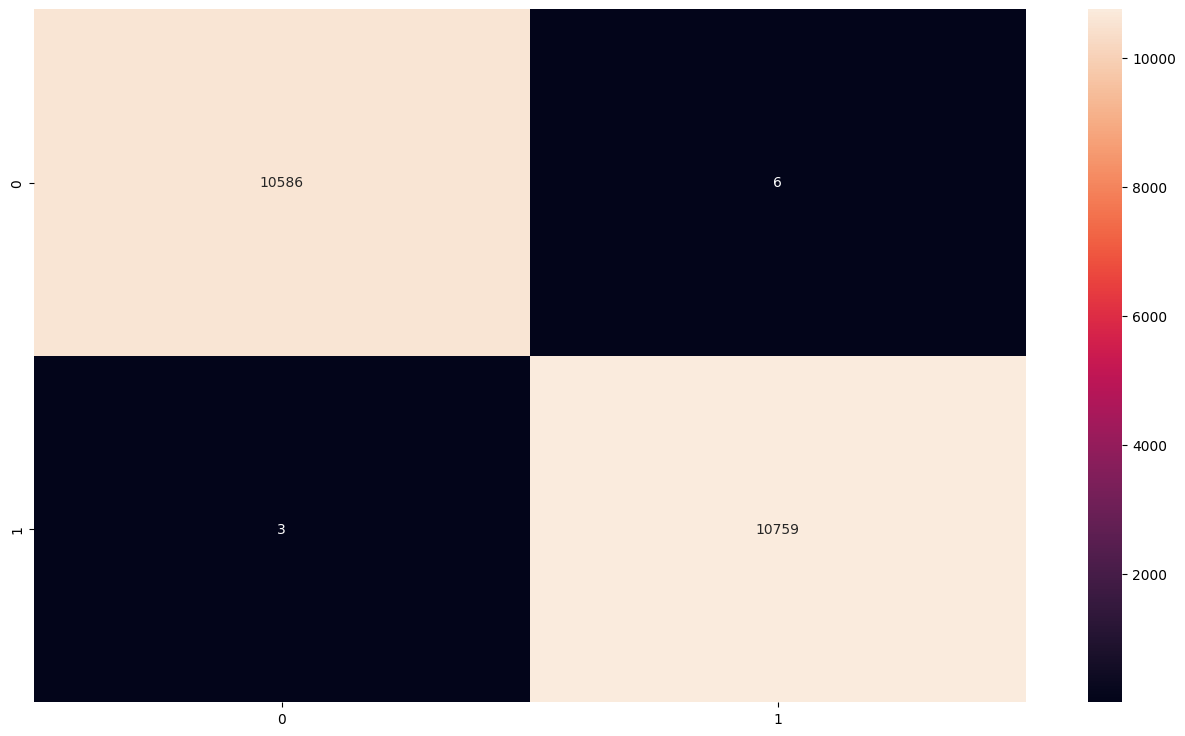

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ytest_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True,
    fmt='g', 
    xticklabels=['0','1'],
    yticklabels=['0','1']
)
plt.show()